In [14]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique, mean, std
import warnings
warnings.simplefilter('ignore')

In [2]:
# importing dataset from github
url = "https://raw.githubusercontent.com/MHBaloch/Machine-Learning-/main/Data.csv" # importing url
dataset = pd.read_csv(url) # reading data fro url
data = dataset # creating dataframe
data.head(2)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure

# Data Information and Descriptive Analysis

In [3]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [40]:
data.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      1.000000

In [4]:
# unique values in features
data.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [5]:
# missing values in features
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [6]:
# duplicate values in features
data.duplicated().any()

False

In [7]:
# droping nominal numerical features
df = data.drop(['UDI','Product ID'], axis = 1)
df.head(2)

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type  
0         42.8                0       0   No Failure  
1         46.3                3       0   No Failure

In [10]:
# variance of each feature
for i in range(df.shape[1]):
    num = len(unique(df.iloc[:,i]))
    percentage = (float(num)/df.shape[0])*100
    print('%d, %d, %.1f%%' % (i,num,percentage))
    
# imported this code from ebook "Data Prepration.. by Jason Brownlee"

0, 3, 0.0%
1, 93, 0.9%
2, 82, 0.8%
3, 941, 9.4%
4, 577, 5.8%
5, 246, 2.5%
6, 2, 0.0%
7, 6, 0.1%


In [11]:
# discrete features
df_disc = [x for x in df if len(df[x].unique()) < 25]
df[df_disc].head(2)

Type  Target Failure Type
0    M       0   No Failure
1    L       0   No Failure

In [12]:
# continuous features
df_cont = [f for f in df.columns if f not in df_disc]
df[df_cont].head(2)

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  
0         42.8                0  
1         46.3                3

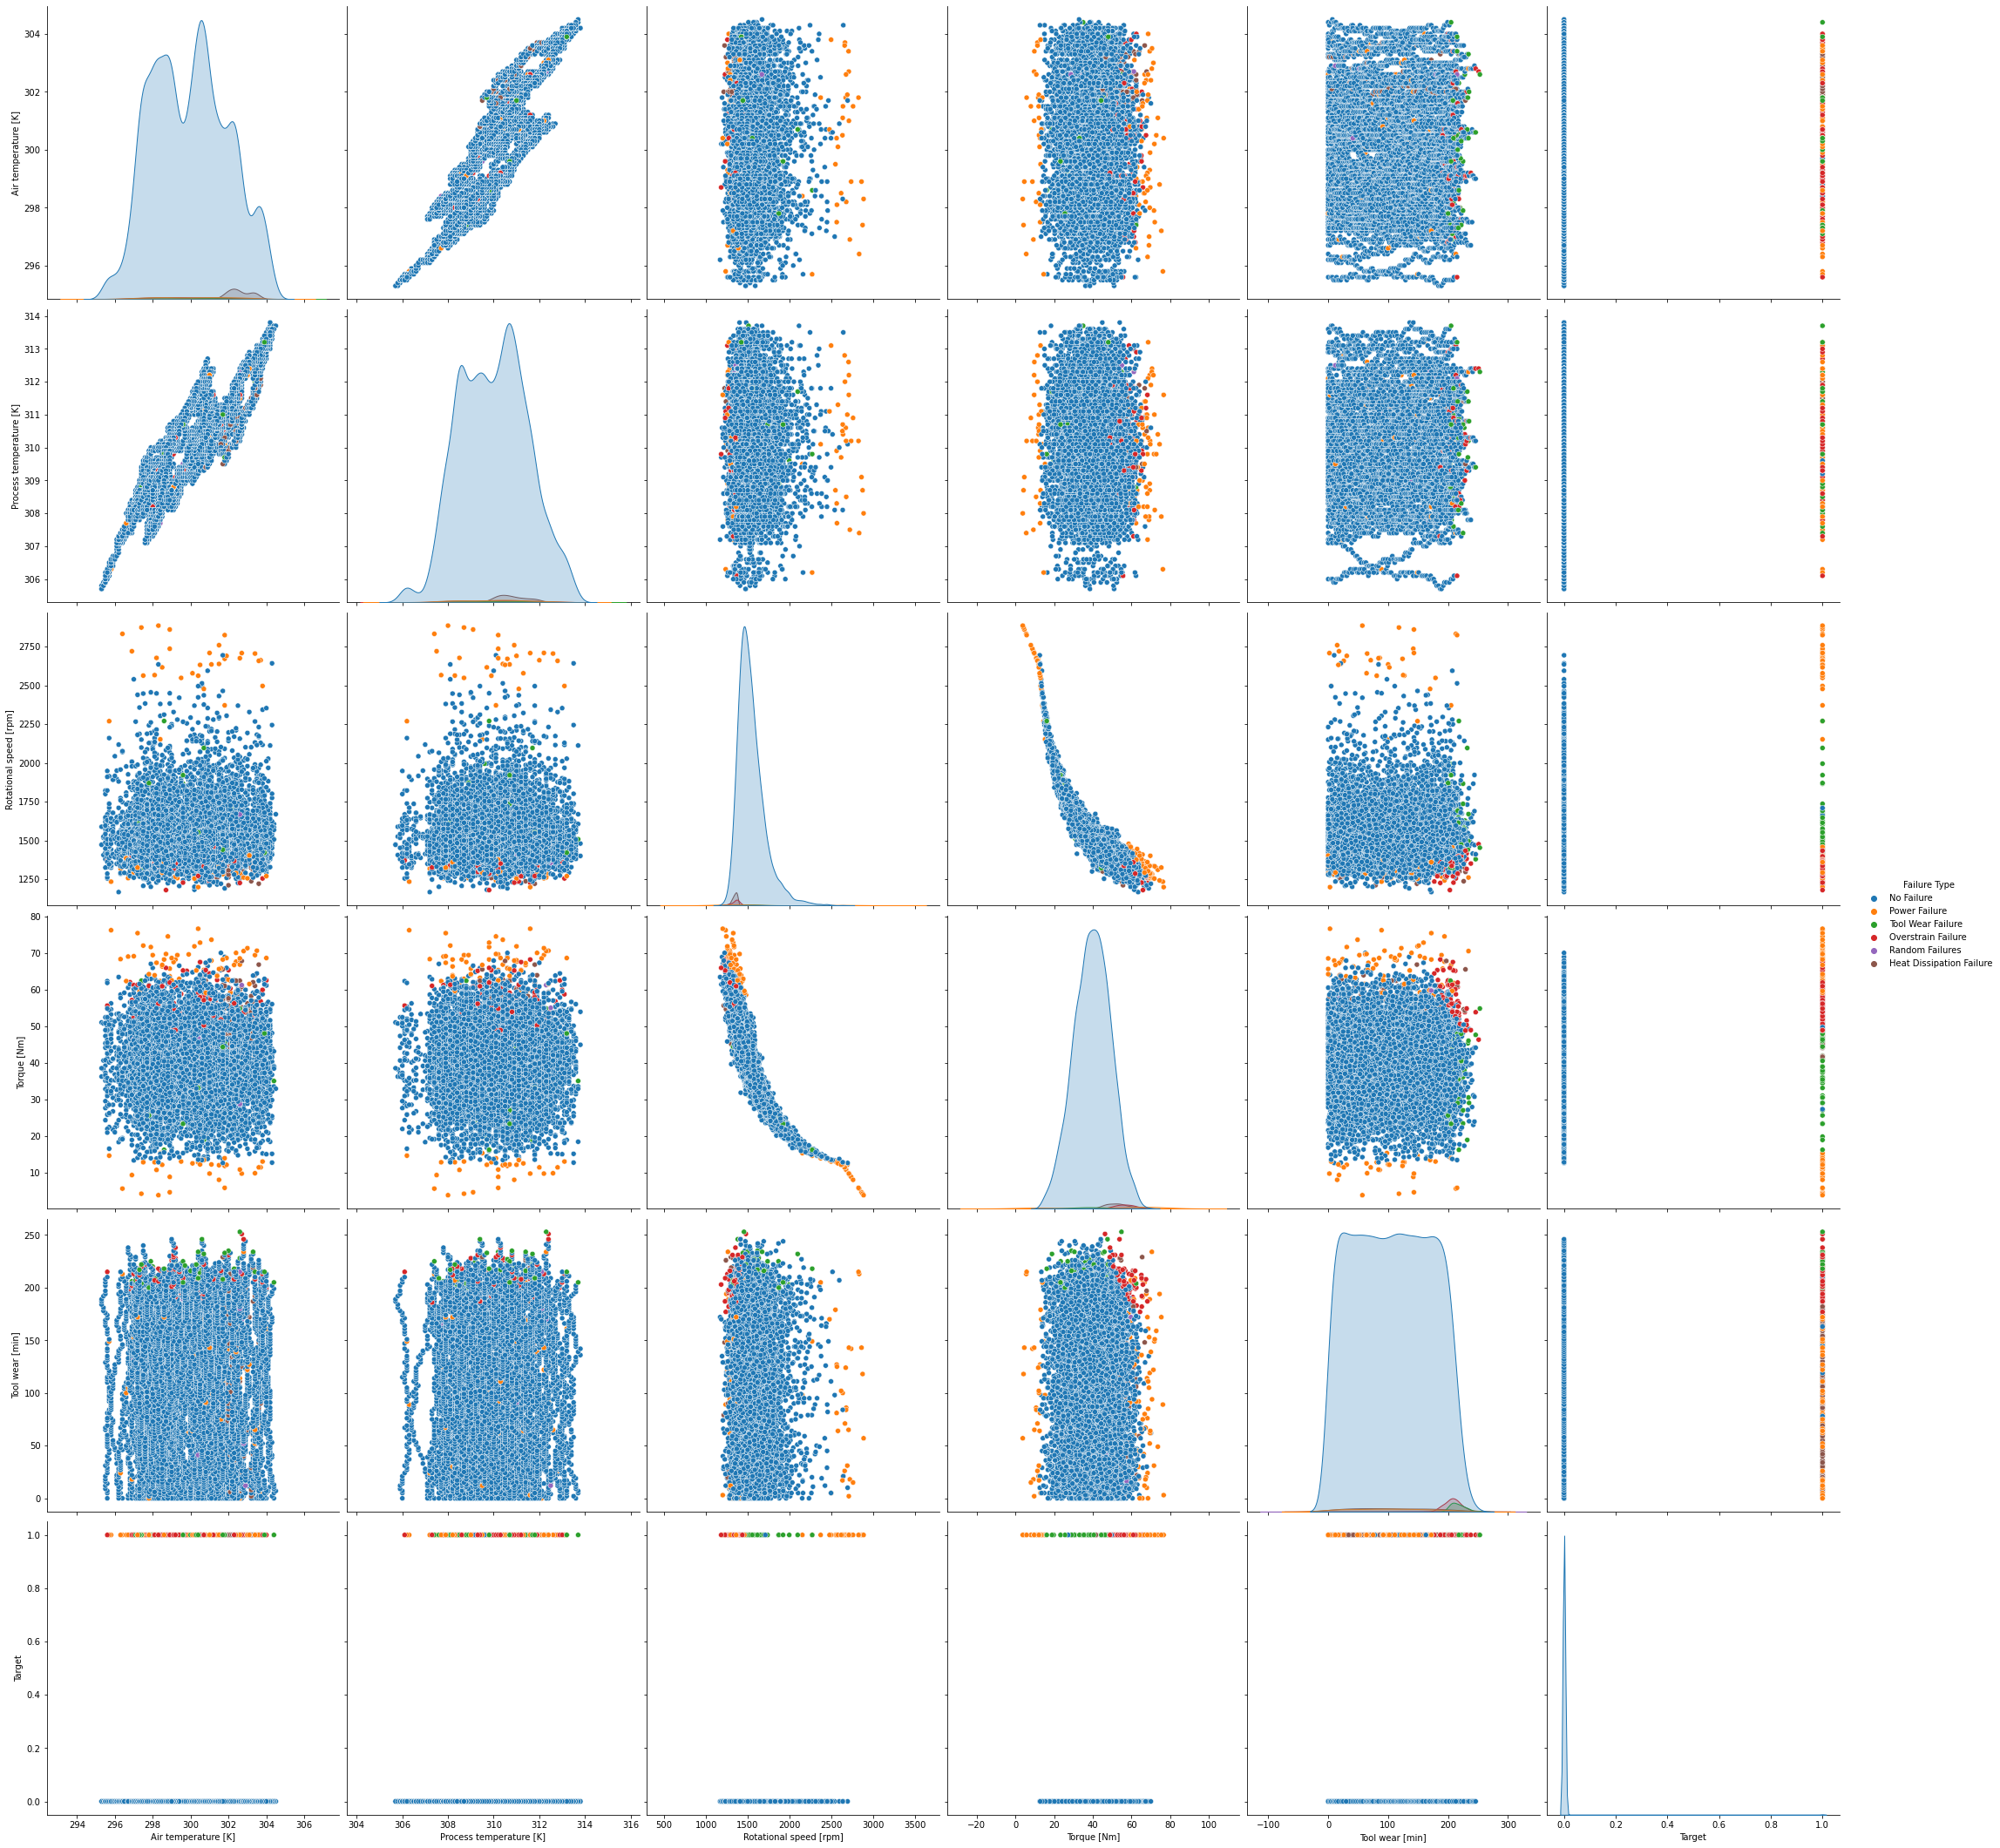

In [15]:
# an insight to the correlation between variables and failure types
sns.pairplot(df, hue = "Failure Type", size=5)
# source (https://seaborn.pydata.org/generated/seaborn.pairplot.html)

In [16]:
# total count of failures except No Failure
df_f_type = df[df['Failure Type'].isin(['Power Failure', 'Overstrain Failure', 'Heat Dissipation Failure', 'Tool Wear Failure', 'Random Failures'])]
len(df_f_type)

348

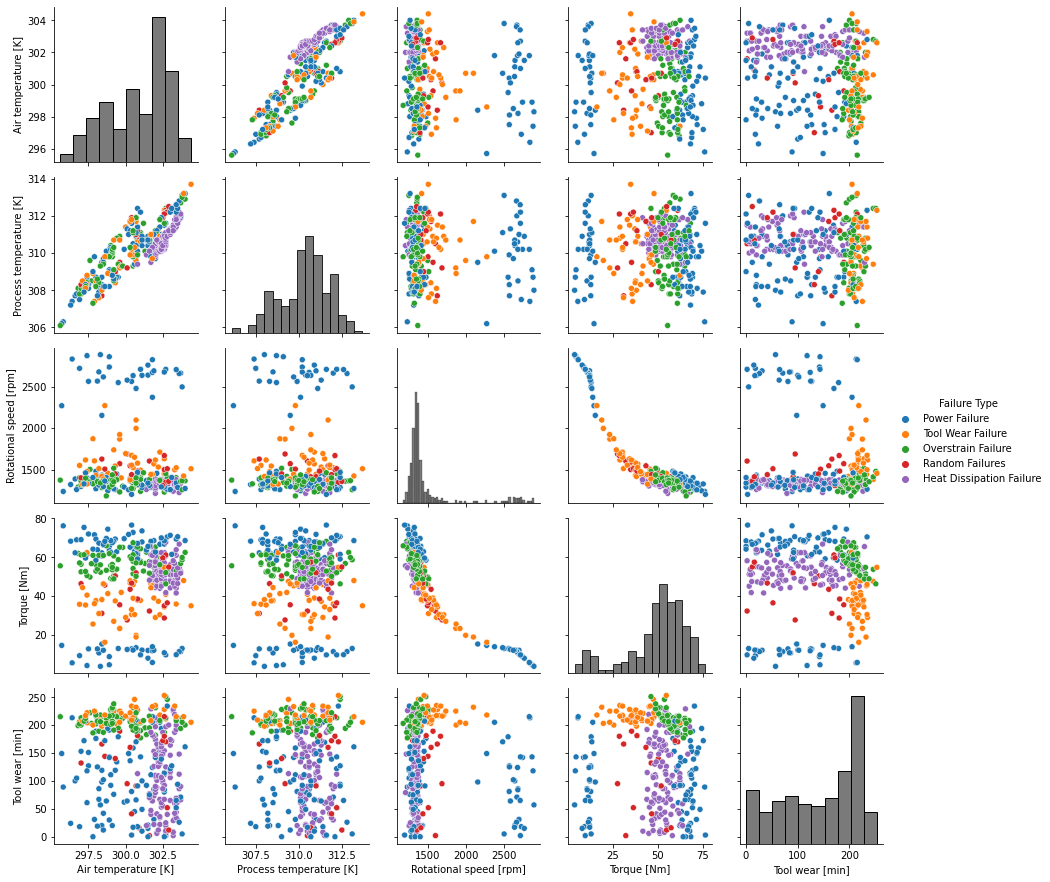

In [18]:
# deep insight to failure cause
variables = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]
g = sns.PairGrid(df_f_type, hue="Failure Type", vars=variables)
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

# source (https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid)

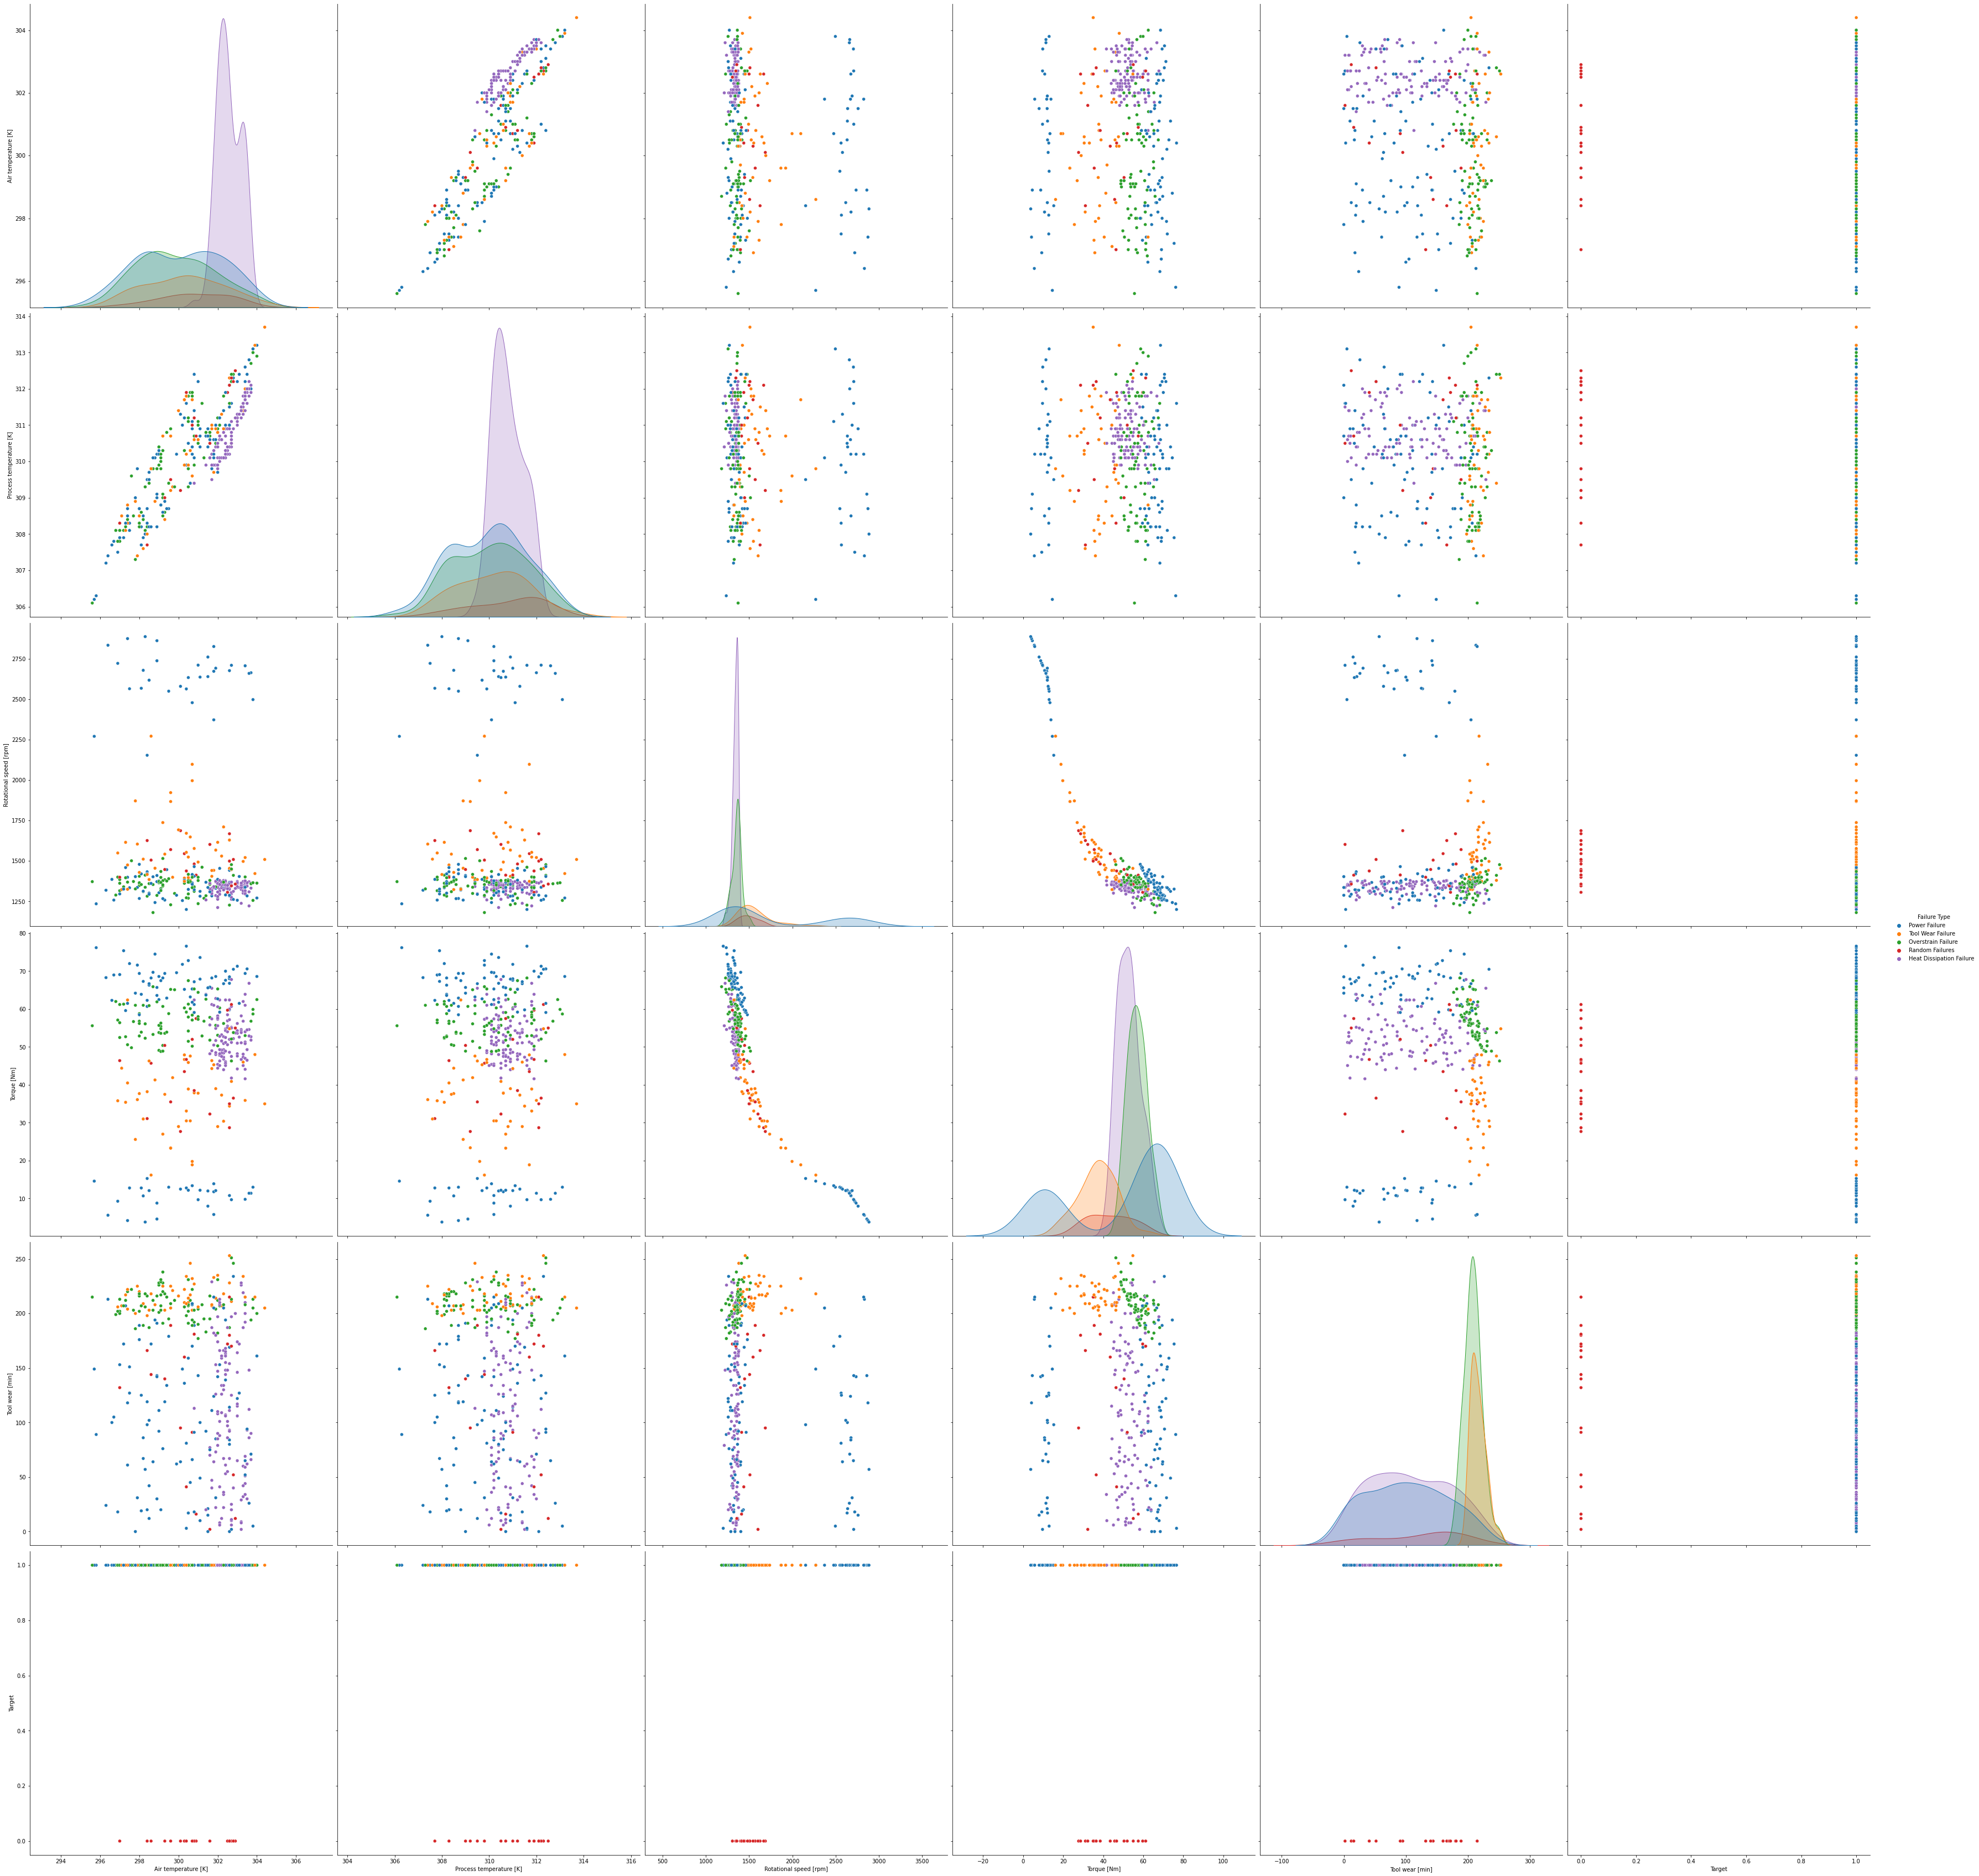

In [19]:
# overview to understand the occurrence of failure to a specific feature
sns.pairplot(df_f_type, hue = "Failure Type", size=8)
# source (https://seaborn.pydata.org/generated/seaborn.pairplot.html)

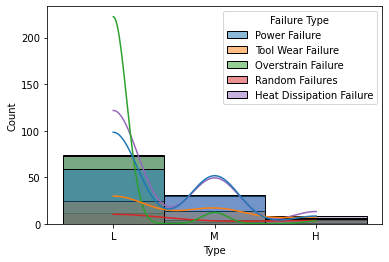

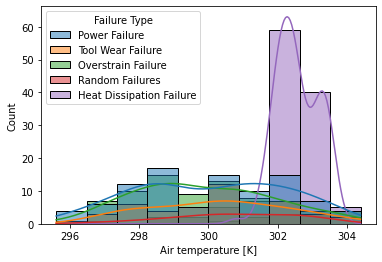

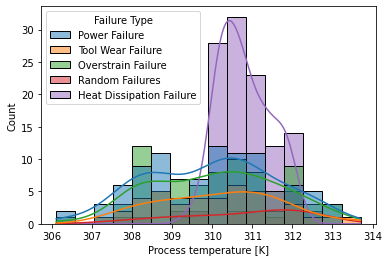

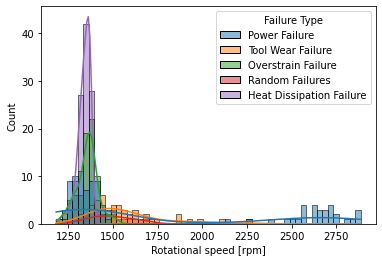

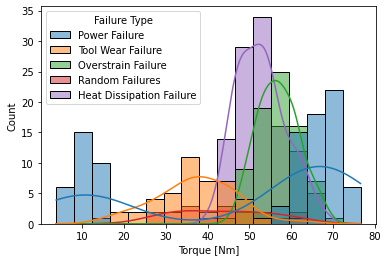

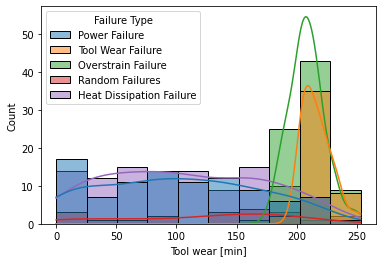

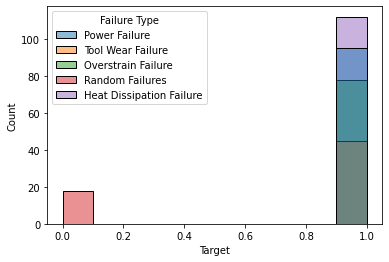

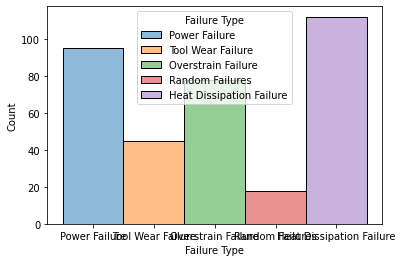

In [17]:
for i in df_f_type[:-1]:
    sns.histplot(data=df_f_type, x=i, hue="Failure Type", kde=True)
    plt.show()

# source: (https://seaborn.pydata.org/generated/seaborn.histplot.html)

In [21]:
df.describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]        Target  
count  10000.000000     10000.000000  10000.000000  
mean      39.986910       107.951000      0.033900  
std        9.968934        63.654147      0.180981  
min        3.800000         0.000000      0.000000  
25%       33.200000        53.000000      0.000000  
50%       40.100000       108.000000      0.000000  
75%       46.800000       162.000000      0.000000  
max       76.600000       253.000000      1.000000

<AxesSubplot:xlabel='Air temperature [K]', ylabel='Density'>

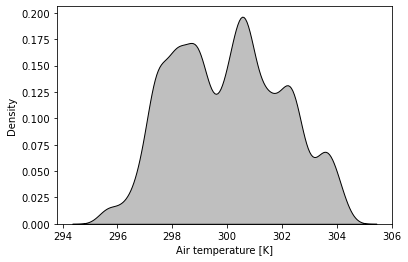

In [22]:
sns.kdeplot(df['Air temperature [K]'], shade=True, color='k')
# source(https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot)

<AxesSubplot:xlabel='Process temperature [K]', ylabel='Density'>

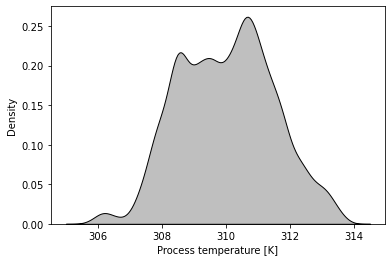

In [23]:
sns.kdeplot(df['Process temperature [K]'], shade=True, color='k')
# source(https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot)

<AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Density'>

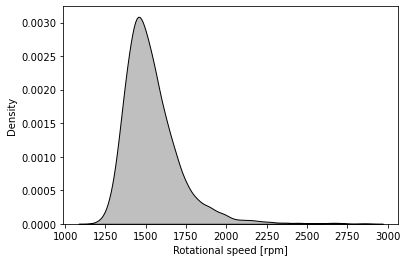

In [24]:
sns.kdeplot(df['Rotational speed [rpm]'], shade=True, color='k')
# source(https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot)

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Density'>

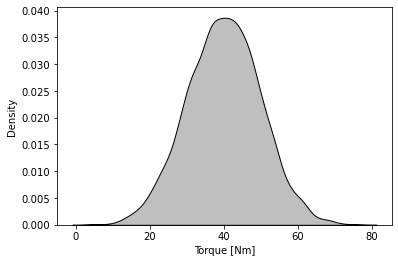

In [25]:
sns.kdeplot(df['Torque [Nm]'], shade=True, color='k')
# source(https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot)

<AxesSubplot:xlabel='Tool wear [min]', ylabel='Density'>

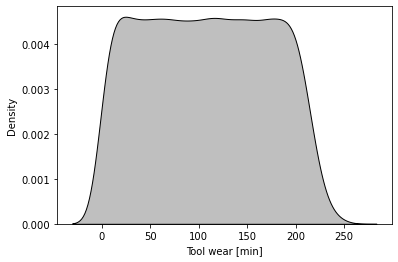

In [26]:
sns.kdeplot(df['Tool wear [min]'], shade=True, color='k')
# source(https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot)

In [27]:
df.skew()
# source(https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot)

Air temperature [K]        0.114274
Process temperature [K]    0.015027
Rotational speed [rpm]     1.993171
Torque [Nm]               -0.009517
Tool wear [min]            0.027292
Target                     5.151852
dtype: float64

In [28]:
out = df.drop(['Type', 'Target', 'Failure Type'], axis=1)
out.head(2)

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  
0         42.8                0  
1         46.3                3

<Figure size 432x288 with 0 Axes>

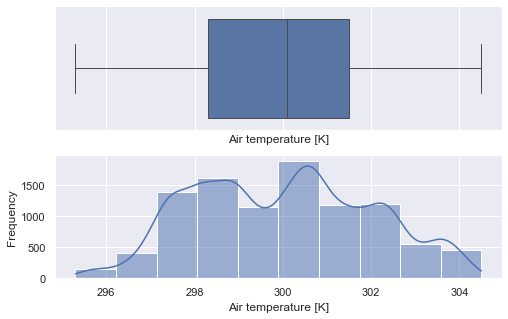

<Figure size 576x360 with 0 Axes>

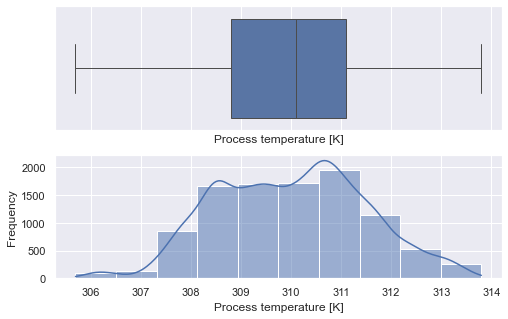

<Figure size 576x360 with 0 Axes>

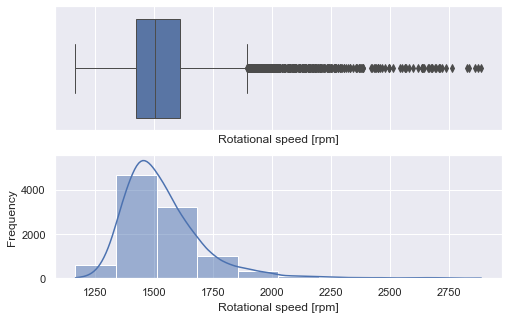

<Figure size 576x360 with 0 Axes>

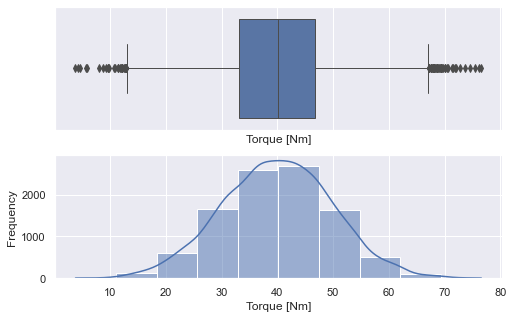

<Figure size 576x360 with 0 Axes>

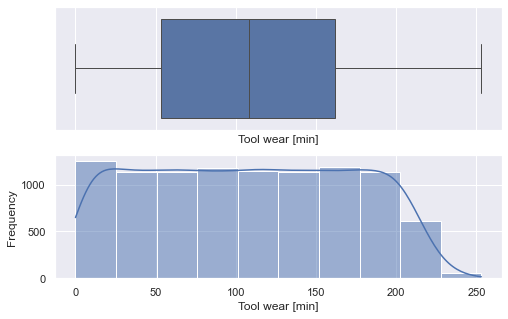

In [29]:
cols = out.columns
cols = list(cols)
for i in out.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={'figure.figsize': (8,5)})
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box, linewidth=1.0)
    sns.histplot(df[i], ax=ax_hist, bins=10, kde=True)
    
# source (https://seaborn.pydata.org/generated/seaborn.boxplot.html)    
# source (https://seaborn.pydata.org/generated/seaborn.histplot.html)

In [30]:
# Outliers in Air Temperature

out_air = out['Air temperature [K]']
Q1_air = np.percentile(out_air, 25)
Q3_air = np.percentile(out_air, 75)
IQR_air = Q3_air-Q1_air
ub_air = Q3_air+1.5*IQR_air
lb_air = Q1_air-1.5*IQR_air
outliers_air = out_air[(out_air > ub_air)|(out_air < lb_air)]
len(outliers_air)
# source (https://medium.datadriveninvestor.com/finding-outliers-in-dataset-using-python-efc3fce6ce32)

0

In [31]:
# Outliers in Process Temperature

out_p = out['Process temperature [K]']
Q1_p = np.percentile(out_p, 25)
Q3_p = np.percentile(out_p, 75)
IQR_p = Q3_p-Q1_p
ub_p = Q3_p+1.5*IQR_p
lb_p = Q1_p-1.5*IQR_p
outliers_p = out_p[(out_p > ub_p)|(out_p < lb_p)]
len(outliers_p)
# source (https://medium.datadriveninvestor.com/finding-outliers-in-dataset-using-python-efc3fce6ce32)

0

In [32]:
# Outliers in Rotational Speed

out_r = out['Rotational speed [rpm]']
Q1_r = np.percentile(out_r, 25)
Q3_r = np.percentile(out_r, 75)
IQR_r = Q3_r-Q1_r
ub_r = Q3_r+1.5*IQR_r
lb_r = Q1_r-1.5*IQR_r
outliers_r = out_r[(out_r > ub_r)|(out_r < lb_r)]
len(outliers_r)
## source (https://medium.datadriveninvestor.com/finding-outliers-in-dataset-using-python-efc3fce6ce32)

418

In [33]:
# Outliers in Torque

out_t = out['Torque [Nm]']
Q1_t = np.percentile(out_t, 25)
Q3_t = np.percentile(out_t, 75)
IQR_t = Q3_t-Q1_t
ub_t = Q3_t+1.5*IQR_t
lb_t = Q1_t-1.5*IQR_t
outliers_t = out_t[(out_t > ub_t)|(out_t < lb_t)]
len(outliers_t)
## source (https://medium.datadriveninvestor.com/finding-outliers-in-dataset-using-python-efc3fce6ce32)

69

In [34]:
# Outliers in Tool Wear

out_tw = out['Tool wear [min]']
Q1_tw = np.percentile(out_tw, 25)
Q3_tw = np.percentile(out_tw, 75)
IQR_tw = Q3_tw-Q1_tw
ub_tw = Q3_tw+1.5*IQR_tw
lb_tw = Q1_tw-1.5*IQR_tw
outliers_tw = out_tw[(out_tw > ub_tw)|(out_tw < lb_tw)]
len(outliers_tw)
# source (https://medium.datadriveninvestor.com/finding-outliers-in-dataset-using-python-efc3fce6ce32)

0

In [35]:
res = [x for x in outliers_t + outliers_r if x not in outliers_t or x not in outliers_r]
if not res:
    print("Lists outliers_t and outliers_r are equal")
else:
    print("Lists outliers_t and outliers_r are not equal")

Lists outliers_t and outliers_r are not equal


In [36]:
np.count_nonzero(~np.isnan(res))

28

<AxesSubplot:>

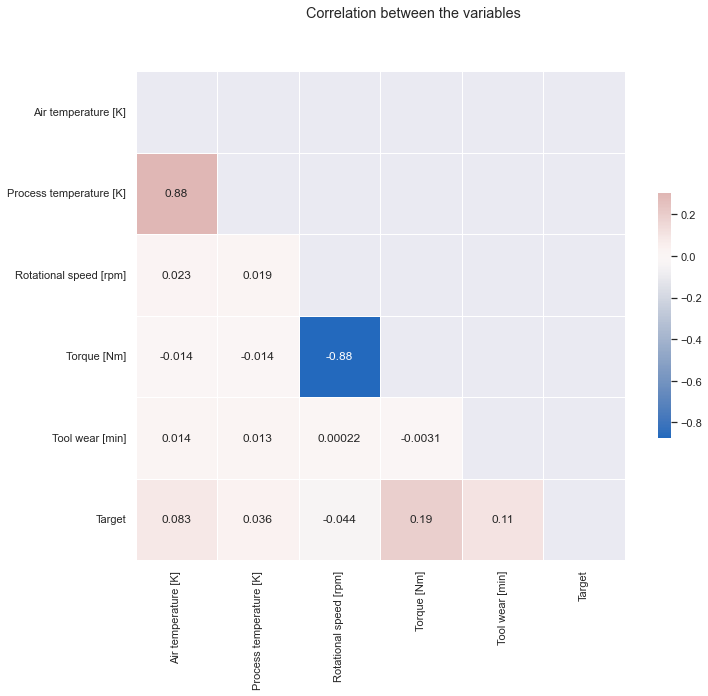

In [37]:
#sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(12, 9))
plt.suptitle('Correlation between the variables')
sns.heatmap(corr, mask=mask, cmap='vlag', vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# source (https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

<AxesSubplot:>

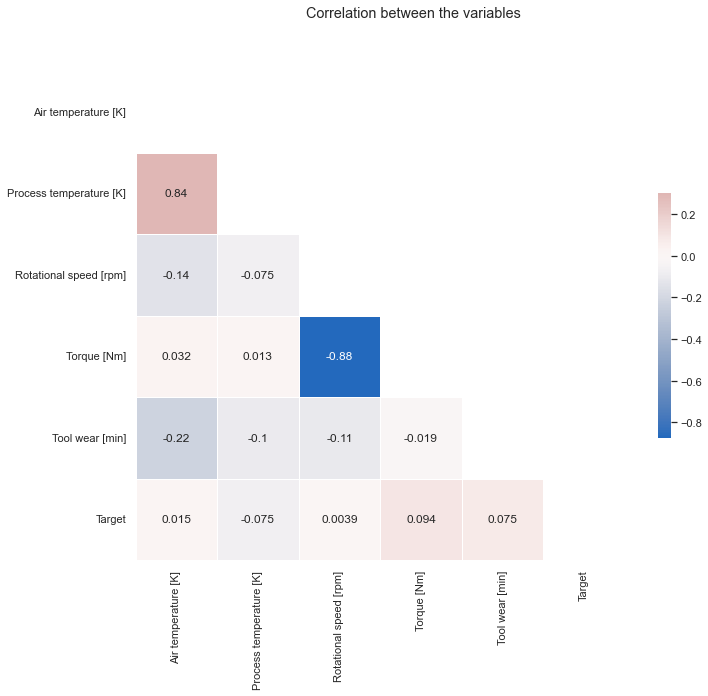

In [38]:
# correlation based on Failure Type subset

sns.set_theme(style="white")
f_type_corr = df_f_type.corr()
mask = np.triu(np.ones_like(f_type_corr, dtype=bool))
plt.subplots(figsize=(12, 9))
plt.suptitle('Correlation between the variables')
sns.heatmap(f_type_corr, mask=mask, cmap='vlag', vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# source (https://seaborn.pydata.org/examples/many_pairwise_correlations.html)